In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def optical_property_generator(wavelength, theta_rad, rel_scale=1.0, rel_density=1.0, rel_pigment=1.0):
    """
    Returns a set of optical properties and scattering as a function of angle

    Parameters:
    rel_scale (float): scale of objects which controls anisotropy. smaller = smaller scatterers
    rel_density (float): density of objects which controls scattering level
    rel_pigment (float): melanin-like absorption level
    wavelength (float): wavelength in microns
    theta_rad (np.ndarray): angles over which to calculate scattering

    Returns:
    mu_abs (float): absorption coefficient (1/µm)
    mu_scat (float): scattering coefficient (1/µm)
    phase_scat (np.ndarray): probability by angle of scattering (already normalized) 
    """

    # simple power-law curve modeling melanin absorption (as function of wavelength)
    # for a HIGH melanin tissue
    A_MELANIN = 6.49E7  # /µm
    B_MELANIN = 3.48

    # simple power-law curve modeling scattering coefficiant (as function of wavelength)
    # for generic human tissue
    A_SCAT_1UM = 0.005  # /µm
    B_SCAT = 1.5

    A_ANISO_1UM = 0.90
    B_ANISO = 0.05

    # absorption curve modeled on a simple melanin approximation
    mu_abs = rel_pigment * A_MELANIN * wavelength **(-B_MELANIN)

    # scattering coefficient modeled on simple human tissue approx
    mu_scat = rel_density * A_SCAT_1UM * wavelength **(-B_SCAT)

    # anisotropy estimate
    g = A_ANISO_1UM * wavelength **(B_ANISO/rel_scale)

    # calculate angle distribution
    cos_theta = np.cos(theta_rad)
    numerator = 1 - g**2
    denominator = 4 * np.pi * (1 + g**2 - 2 * g * cos_theta)**1.5
    
    # The result represents the phase function p(theta) which is normalized such that 
    # the integral over 4*pi steradians is unity.
    phase_scat = numerator / denominator

    return(mu_abs, mu_scat, phase_scat)

60.373835392494314
60.373835392494314
104.80935072788114
104.80935072788114
156.7322557739791
156.7322557739791


Text(0.5, 1.0, 'Probability of Scatter to Angle per 1µm Path Length')

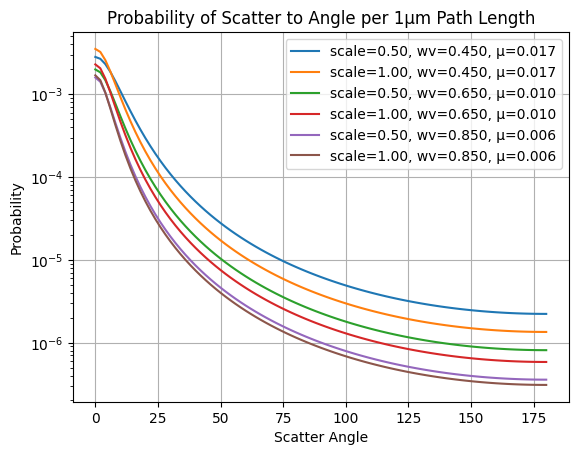

In [30]:
angles_degrees = np.arange(0, 181, 2)
angles_radians = 2 * np.pi * angles_degrees / 360

for wavelength in np.array([0.45, 0.65, 0.85]):
    for rel_scale in np.array([0.5, 1]):
        mu_abs, mu_scat, phase_scat = optical_property_generator(
            rel_scale=rel_scale, 
            rel_density=1, 
            rel_pigment=0, 
            wavelength=wavelength,
            theta_rad=angles_radians)

        plt.semilogy(angles_degrees, mu_scat*phase_scat/phase_scat.sum(), label=f'scale={rel_scale:0.2f}, wv={wavelength:0.3f}, µ={mu_scat:0.3f}')
        print(1/mu_scat)

plt.ylabel('Probability')
plt.xlabel('Scatter Angle')
plt.grid()
plt.legend()
plt.title('Probability of Scatter to Angle per 1µm Path Length')